In [24]:
from moabb.datasets import BNCI2014001
import mne
from matplotlib import pyplot as plt
import numpy as np
import biosppy
import seaborn

In [5]:
PATH = "../datasets/"
DOWNLOADED = False

In [6]:
a = BNCI2014001()

In [ ]:
a.download(PATH, update_path=True)

In [9]:
s1 = a.get_data([1])
s1_raw = s1[1]['session_T']['run_0']

C:\Users\sayan\.conda\envs\ntuoft-env\lib\site-packages\mne\utils\docs.py:830: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\sayan\.conda\envs\ntuoft-env\lib\site-packages\mne\utils\docs.py:813: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)
c:\users\sayan\projects\neurotechuoft\moabb\moabb\datasets\bnci.py:531: DeprecationWarning: Setting a montage using anything rather than DigMontage is deprecated and will raise an error in v0.20. 

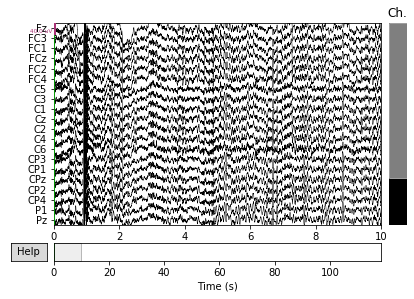

In [10]:
s1_raw.plot()
plt.show()

In [11]:
s1_info = s1_raw.info

In [12]:
s1_chs = s1_info['ch_names']

In [13]:
s1_info['sfreq']

250.0

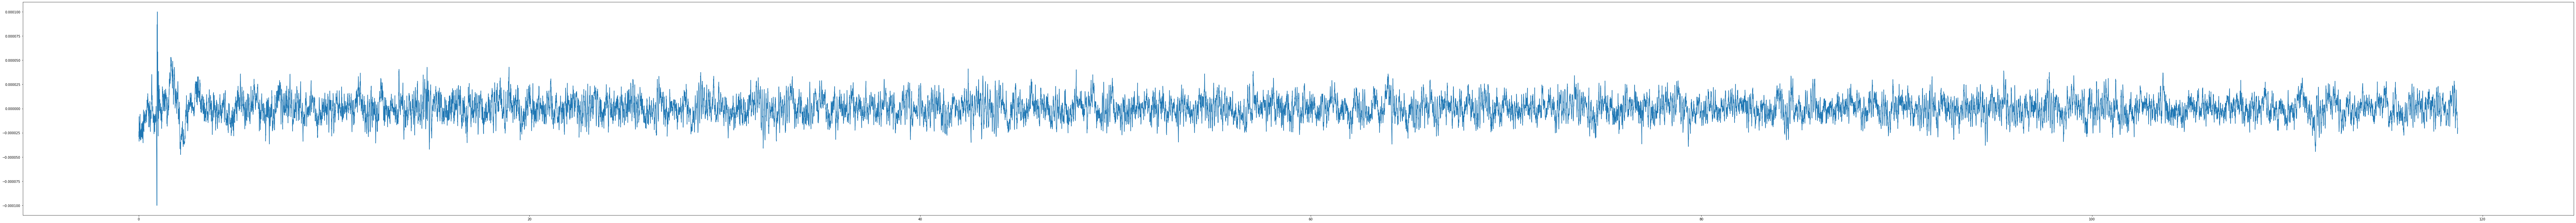

In [14]:
plt.rcParams['figure.figsize'] = [140, 12]
data, t = s1_raw[s1_chs.index('C4')]
plt.plot(t, data.T)

In [15]:
def plot_eeg(t, eeg):
    plt.rcParams['figure.figsize'] = [140, 12]

    fig = plt.figure()
    
    ax_start = 0.1
    ax_step = (0.9 - 0.1) / eeg.shape[0] # Divide graph into channels
    
    axes= []
    colours = ['#A283C4', '#8B2BC4', '#3978E0', '#FFA500', '#3CB2BA', '#FF7685']
    
    for i in range(eeg.shape[0]):
        axes.append(fig.add_axes([0.1, ax_start + i * ax_step, 0.9, ax_step]))
    
    for i in range(eeg.shape[0]):
        axes[i].plot(t, eeg[eeg.shape[0] - i - 1], color=colours[i % len(colours)])

    plt.xticks(np.arange(t[0], t[-1], 1.0))

    fig.show()

C:\Users\sayan\.conda\envs\ntuoft-env\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


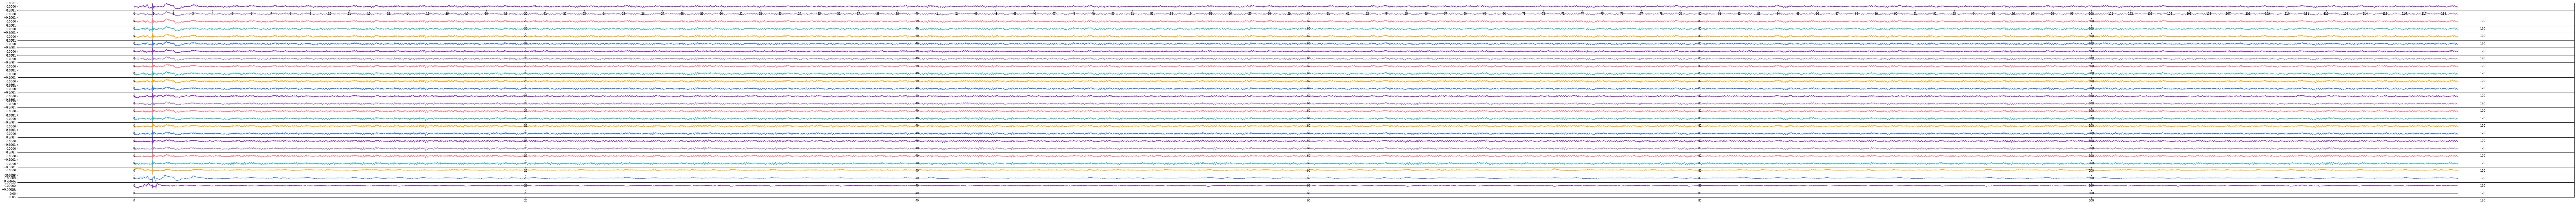

In [17]:
data, t = s1_raw[:,:]
plot_eeg(t,data)

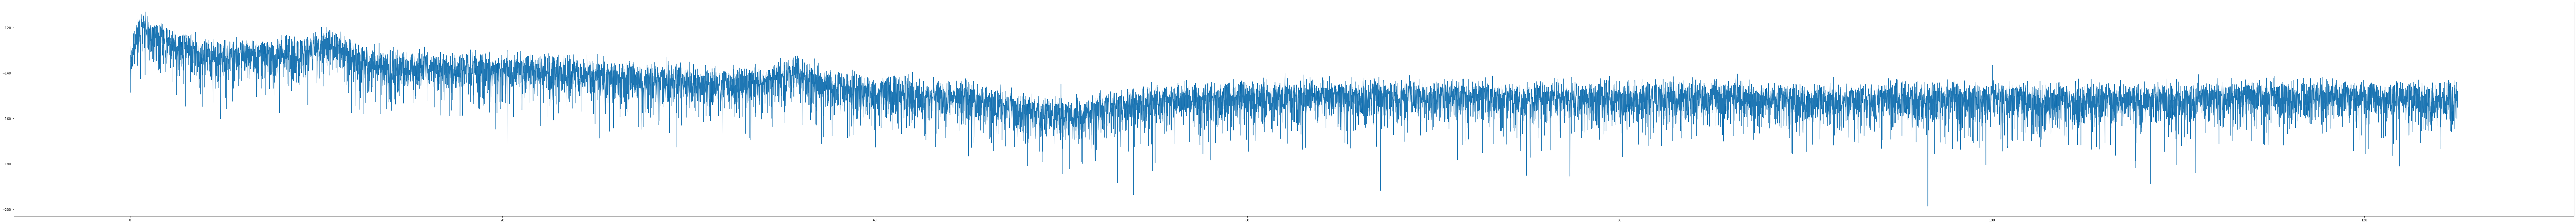

In [18]:
freq_1_channel, psd_1_channel = biosppy.tools.power_spectrum(signal=data[0],
                   sampling_rate=s1_info['sfreq'],
                   pad=None,
                   pow2=False,
                   decibel=True)
psd_1_channel.shape
plt.plot(freq_1_channel, psd_1_channel)

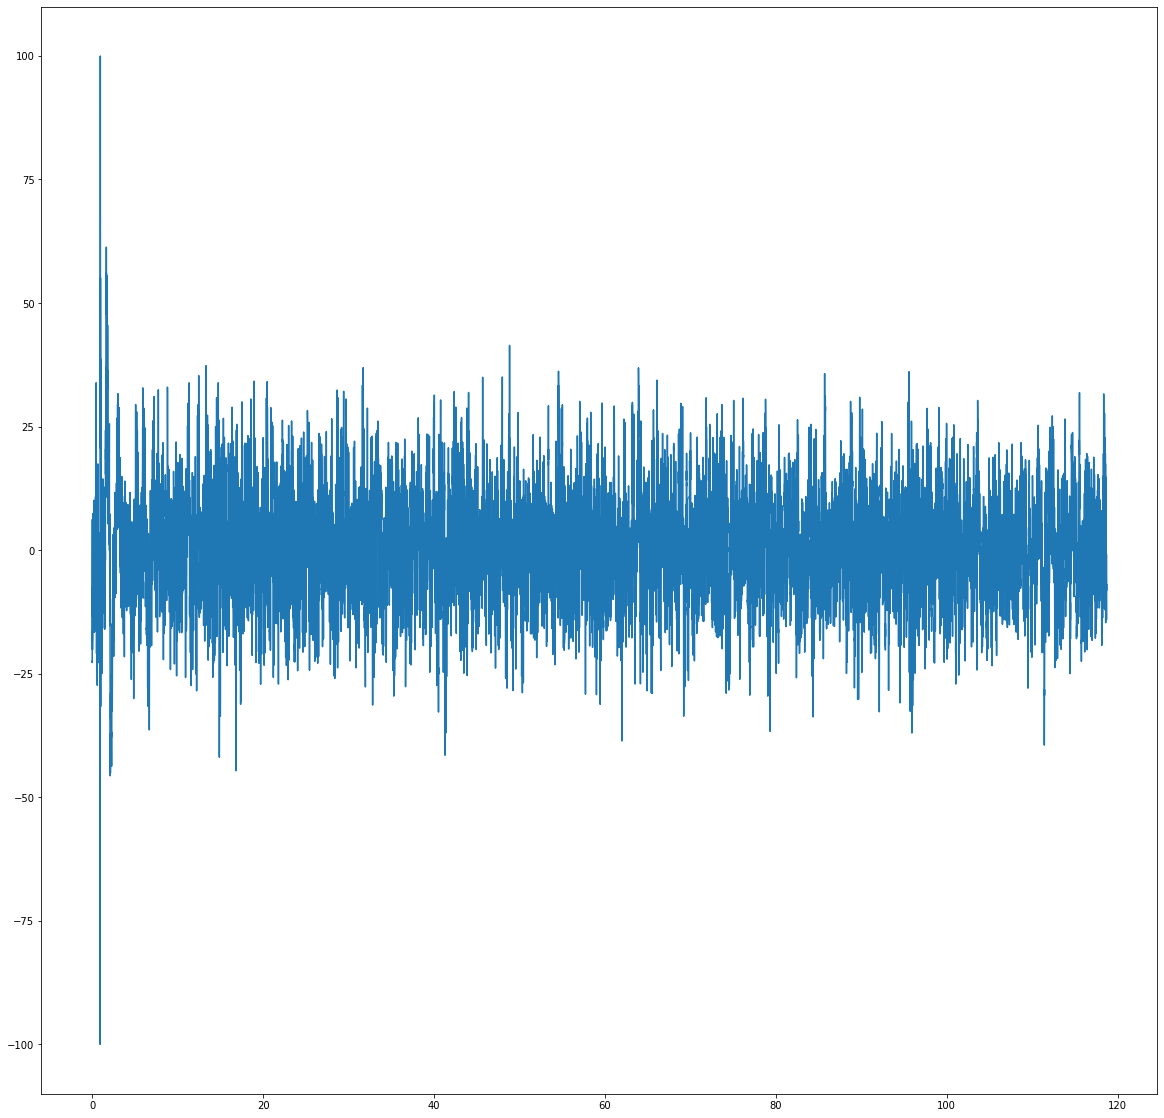

In [19]:
plt.rcParams['figure.figsize'] = [20, 20]
start = int(s1_info['sfreq'] / 2)
stop = int(s1_info['sfreq'] * 1.0)*50 + start
data, t = s1_raw[s1_chs.index('C3')]
# filtered = mne.filter.filter_data(data[:, start:],s1_info['sfreq'], 7, 13)
fig = plt.figure()
# plt.subplot(2, 1, 1)
plt.plot(t, data.T * 1.0e6)
# plt.subplot(2,1,2)
# data2, t2 = s1_raw[s1_chs.index('stim')]
# plt.plot(t2, data2.T)

Setting up band-pass filter from 7 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 413 samples (1.652 sec)



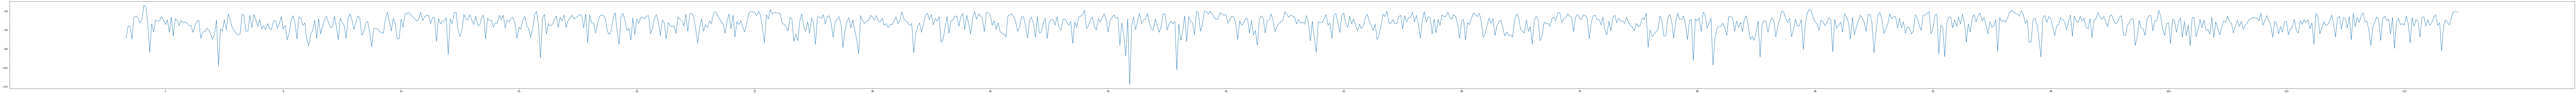

In [22]:
from sklearn.preprocessing import normalize

plt.rcParams['figure.figsize'] =  [200, 7]

start = 0 # int(s1_info['sfreq'] / 2)
stop = data.shape[1] # int(s1_info['sfreq'] * 1.0)*50 + start

data, t = s1_raw[s1_chs.index('C3')]
filtered = mne.filter.filter_data(data[:, start:stop],s1_info['sfreq'], 7, 13)
fig = plt.figure()
WINDOW_SIZE = 20
filtered /= np.std(filtered)
# data2, t2 = s1_raw[s1_chs.index('Stim')]
# plt.subplot(2,1,1)
# plt.plot(t[start:stop],filtered.T)
# plt.subplot(2,1,2)
# plt.plot(t2[start:stop],data2.T[start:stop])
# iterate over power spectrum
powers = []
# steps:
# 1- windowing
# 2- loop over all windows
# 3- Get the average power spectrum
def get_mu_average(signal, srate = 512):

    freq_1_channel, psd_1_channel = biosppy.tools.power_spectrum(signal=signal,
               sampling_rate=s1_info['sfreq'],
               pad=None,
               pow2=False,
               decibel=True)
    return biosppy.signals.tools.band_power(freq_1_channel,psd_1_channel,[7,13])
filtered = filtered.T
ind,vals = biosppy.signals.tools.windower(filtered,50,25,get_mu_average,kernel="hamming")
# print(vals.shape)
# 250
# interpolate values array
data = data.T
ind_extended = np.linspace(0,len(data),num=len(data))
vals_extended = np.interp(ind_extended,ind,vals[:,0])

# ind_extended = np.interp(np.linspace(start,stop))
# interpolation
# ind_extended = 

# for i in range((stop-start)):
#     freq_1_channel, psd_1_channel = biosppy.tools.power_spectrum(signal=filtered,
#                    sampling_rate=s1_info['sfreq'],
#                    pad=None,
#                    pow2=False,
#                    decibel=True)
#     print(freq_1_channel)
#     powers.append(psd_1_channel)

# psd_1_channel has similar values in each index

# plt.plot(freq_1_channel, psd_1_channel[:, 0])
# print(len(powers))
# plt.plot(powers)
plt.plot(t,vals_extended)
plt.xticks(np.arange(2, t[-1], 6)) 
plt.show()

Text(0.5, -0.05, 'Event-related desynchronization (ERD) in BNCI2014-001 dataset (from MOABB).\n Average bandpower (uV^2) in the mu band (7-13Hz) seems to decrease when \n subject is asked to perform movement (at t=2s). 95% confidence interval plotted.')

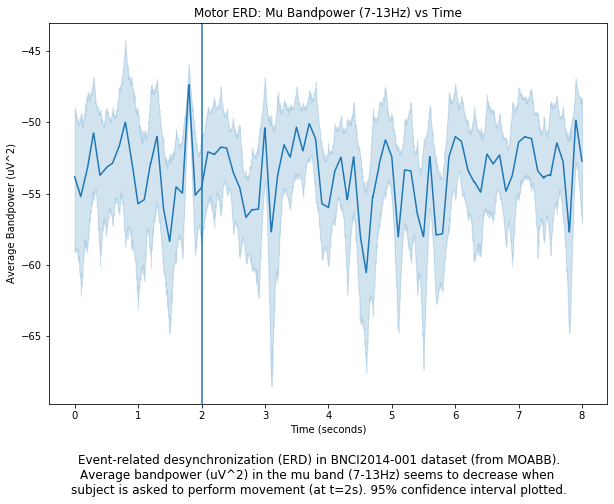

In [64]:
plt.rcParams['figure.figsize'] =  [10, 7]

# average signals every 6 seconds
V = []
# Iterate over t and find intervals

for i in range(int(max(t)/8)):
    V.append(int(np.where(t == i*8)[0]))
    V.append(int(np.where(t == i*8+8)[0]))

# print(V)
# print(vals_extended[0])
# times = np.linspace()
trial_vals = np.split(vals_extended, V, axis=0)
# avg_trial = np.mean(trial_vals[1::2],axis=0)
# times = np.linspace(0,8,250*8)

# Making array of all trials.
# Seaborn only accepts 1-D data, so flattening data and tiling times:
# t=[0, 1, 2] , y=[[3,4,5], [5,3,6]] ->
# t=[0,1,2,0,1,2], y=[3,4,5,5,3,6]

all_trials = np.array(trial_vals[1::2])
all_times = np.tile(times, all_trials.shape[0])
seaborn.lineplot(all_times, all_trials.flatten())

# plt.plot(all_times, all_trials.flatten())

# Vertical line showing movement onset
plt.axvline(2.0, 0, 1)

# Labels
plt.xlabel("Time (seconds)")
plt.ylabel("Average Bandpower (uV^2)")
plt.title("Motor ERD: Mu Bandpower (7-13Hz) vs Time")

caption = "Event-related desynchronization (ERD) in BNCI2014-001 dataset (from MOABB).\n Average bandpower (uV^2) in the mu band (7-13Hz) seems to decrease when \n subject is asked to perform movement (at t=2s). 95% confidence interval plotted."
plt.figtext(0.5, -0.05, caption, wrap=True, horizontalalignment='center', fontsize=12)